# Microsoft Capstone Project
### MariBelajar.org Non-open source Dataset
### Subtheme: **Education** 


By: Zhafira E. Fawnia - DAI007 - Data & AI 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# They have three datases
# One is the catalog, but we will not need. We will just need their course activities and scorecard from 2020 and 2021
fy20 = pd.read_excel('/content/drive/My Drive/MariBelajar/FY20.xlsx')
fy21 = pd.read_excel('/content/drive/My Drive/MariBelajar/FY21.xlsx')

## Preprocessing FY21 Data

In [4]:
fy21.head()

,No,Fiscal Year,Quarter,Tanggal Pelaksanaan,Durasi /Jam,Nama Kegiatan,Program,Segmen,Government Official,Non-Government Official,Total Peserta,Azure Higher Ed,Unnamed: 12
0,1.0,2021.0,Q1,2020-09-15,4.0,Azure Fundamental for Higher Ed,Azure Higher Ed,Higher Ed,12.0,10.0,22,MAU,Higher Ed
1,2.0,2021.0,Q1,2020-09-22,4.0,Designing Azure for Academic Infrastructure,Azure Higher Ed,Higher Ed,22.0,31.0,53,TAU,Educator (K-12)
2,3.0,2021.0,Q1,2020-09-28,4.0,Designing Virtual Labs with Azure,Azure Higher Ed,Higher Ed,18.0,13.0,31,GTP,Professional
3,4.0,2021.0,Q1,2020-09-04,3.0,Creating A Virtual Classroom using Microsoft T...,GTP,Higher Ed,96.0,0.0,96,Premium,Public
4,5.0,2021.0,Q1,2020-09-28,6.0,Creating Smart Classroom with Microsoft 365,GTP,Higher Ed,39.0,0.0,39,NaN,NaN


In [5]:
fy21.shape

(155, 13)

In [6]:
# Checking for column names
for col in fy21.columns:
    print(col)

# fy21.info()

No
Fiscal Year
Quarter
Tanggal Pelaksanaan
Durasi /Jam
Nama Kegiatan
Program
Segmen
Government Official 
Non-Government Official
Total Peserta
Azure Higher Ed
Unnamed: 12


In [7]:
# Dropping "No" column, cause we already have index to do so
fy21 = fy21.drop(labels=["No","Azure Higher Ed", "Unnamed: 12"], axis=1)

In [8]:
# Removing special character (Spaces)
fy21.columns = fy21.columns.str.replace(' ', '')

In [9]:
# Checking the missing values
fy21.isnull().sum()

FiscalYear                  1
Quarter                     1
TanggalPelaksanaan          1
Durasi/Jam                  1
NamaKegiatan                1
Program                     1
Segmen                      1
GovernmentOfficial        103
Non-GovernmentOfficial     91
TotalPeserta                0
dtype: int64

In [11]:
# creating bool series True for NaN values 
bool_series = pd.isnull(fy21["Quarter"]) 
    
# filtering data 
# displaying data only with the designated values = NaN 
fy21[bool_series] 

,FiscalYear,Quarter,TanggalPelaksanaan,Durasi/Jam,NamaKegiatan,Program,Segmen,GovernmentOfficial,Non-GovernmentOfficial,TotalPeserta
154,NaN,NaN,NaT,NaN,NaN,NaN,NaN,2479.0,3013.0,8805


In [13]:
fy21 = fy21.drop(154)

In [14]:
fy21.head()

,FiscalYear,Quarter,TanggalPelaksanaan,Durasi/Jam,NamaKegiatan,Program,Segmen,GovernmentOfficial,Non-GovernmentOfficial,TotalPeserta
0,2021.0,Q1,2020-09-15,4.0,Azure Fundamental for Higher Ed,Azure Higher Ed,Higher Ed,12.0,10.0,22
1,2021.0,Q1,2020-09-22,4.0,Designing Azure for Academic Infrastructure,Azure Higher Ed,Higher Ed,22.0,31.0,53
2,2021.0,Q1,2020-09-28,4.0,Designing Virtual Labs with Azure,Azure Higher Ed,Higher Ed,18.0,13.0,31
3,2021.0,Q1,2020-09-04,3.0,Creating A Virtual Classroom using Microsoft T...,GTP,Higher Ed,96.0,0.0,96
4,2021.0,Q1,2020-09-28,6.0,Creating Smart Classroom with Microsoft 365,GTP,Higher Ed,39.0,0.0,39


## Visualizations for FY21

Higher Ed             0.422078
K-12                  0.331169
Higher Ed and K-12    0.233766
Corporate             0.012987
Name: Segmen, dtype: float64


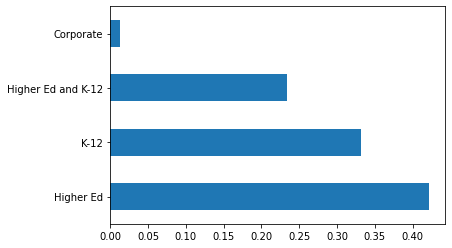

In [15]:
# Let's calculate the percentage of each segment category.
print(fy21.Segmen.value_counts(normalize=True))

# Plot the bar graph of percentage segment categories
fy21.Segmen.value_counts(normalize=True).plot.barh()
plt.show()

MAU                  0.194805
GTP                  0.181818
GTP K12              0.129870
Micro Credentials    0.097403
Showcase School      0.084416
Azure AI             0.058442
Minecraft            0.058442
Edvision             0.051948
M365                 0.045455
Teams Coaching       0.038961
Merdeka Belajar      0.025974
Azure Higher Ed      0.019481
Premium Training     0.012987
Name: Program, dtype: float64


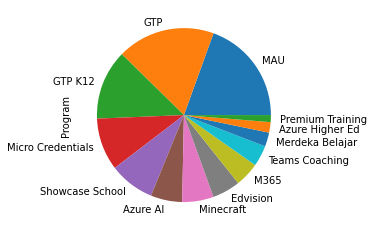

In [16]:
#calculate the percentage of each education category.
print(fy21.Program.value_counts(normalize=True))

#plot the pie chart of education categories
fy21.Program.value_counts(normalize=True).plot.pie()
plt.show()

In [17]:
fy21.TotalPeserta.describe()

count    154.000000
mean      57.175325
std       65.050321
min        1.000000
25%       17.500000
50%       36.000000
75%       67.750000
max      439.000000
Name: TotalPeserta, dtype: float64

              Durasi/Jam  TotalPeserta
Durasi/Jam      1.000000     -0.004262
TotalPeserta   -0.004262      1.000000


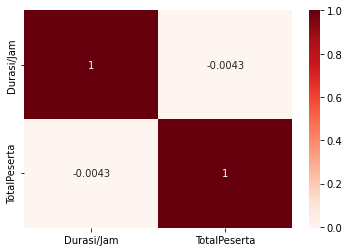

In [18]:
# Check if durasi has a correlation with the amount of people attending
print(fy21[['Durasi/Jam','TotalPeserta']].corr())

# Checks using a heatmap
sns.heatmap(fy21[['Durasi/Jam','TotalPeserta']].corr(), annot=True, cmap = 'Reds')
plt.show()

In [19]:
def visualizer(x, y, plot_type, title, xlabel, ylabel, rotation=False, rotation_value=60, figsize=(15,8)):
    plt.figure(figsize=figsize)
    
    if plot_type == "bar":  
        sns.barplot(x=x, y=y)
    elif plot_type == "count":  
        sns.countplot(x)
    elif plot_type == "reg":  
        sns.regplot(x=x,y=y)
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=11)
    plt.ylabel(ylabel, fontsize=11)
    plt.yticks(fontsize=13)
    if rotation == True:
        plt.xticks(fontsize=11,rotation=rotation_value)
    plt.show()

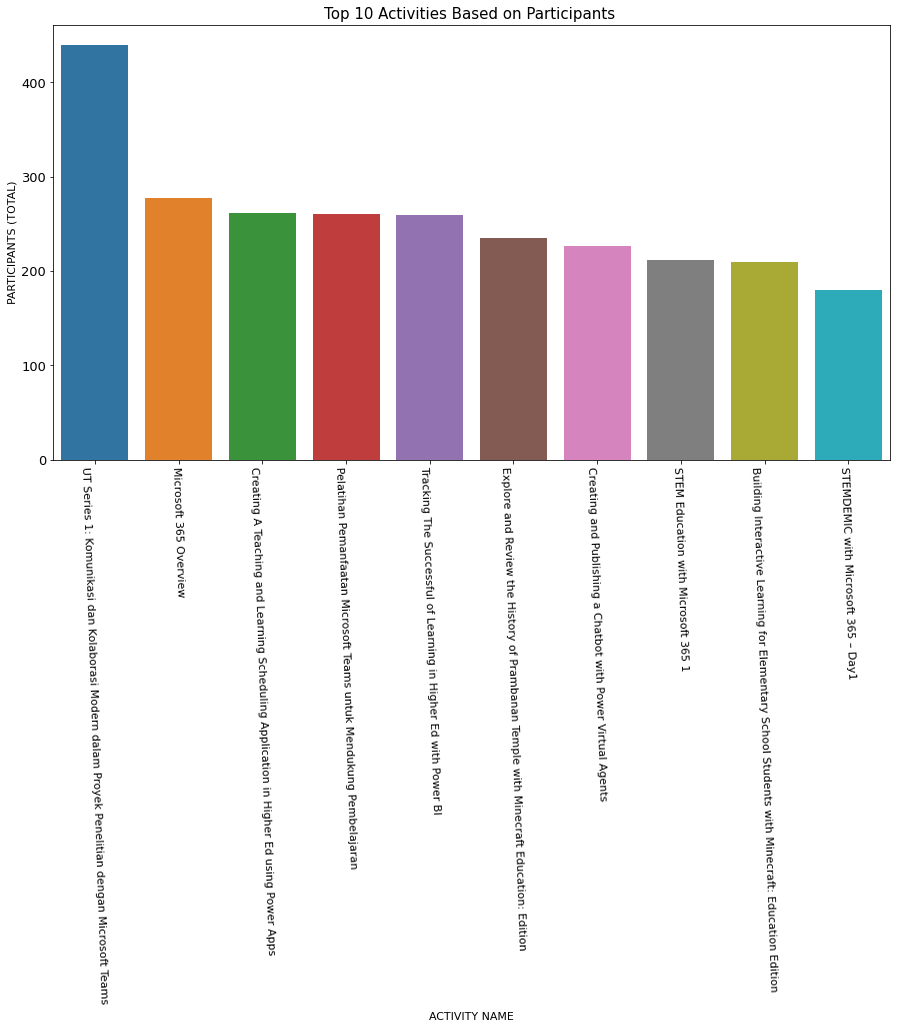

In [20]:
fy21_participants_sorted = fy21.sort_values('TotalPeserta', ascending=False)
subset_fy21_participants_sorted = fy21_participants_sorted[:10]

visualizer(subset_fy21_participants_sorted.NamaKegiatan, subset_fy21_participants_sorted.TotalPeserta, "bar", "Top 10 Activities Based on Participants ",
          "ACTIVITY NAME", "PARTICIPANTS (TOTAL)", True, -88)

In [21]:
# Need to filter out Null values in Government Official and Non-Government Official
fy21_gov = fy21[fy21["GovernmentOfficial"].notnull()]
fy21_ngov = fy21[fy21["Non-GovernmentOfficial"].notnull()]

AxesSubplot(0.547727,0.125;0.352273x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of non-government official attendees')

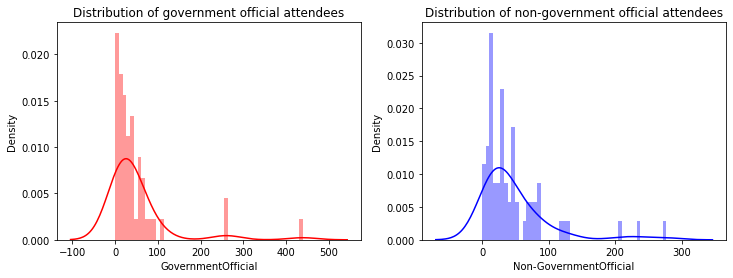

In [22]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(fy21_gov['GovernmentOfficial'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of government official attendees')

ax=f.add_subplot(122)
print(sns.distplot(fy21_ngov['Non-GovernmentOfficial'],bins=50,color='b',ax=ax))
ax.set_title('Distribution of non-government official attendees')

              Durasi/Jam  TotalPeserta
Durasi/Jam      1.000000     -0.004262
TotalPeserta   -0.004262      1.000000


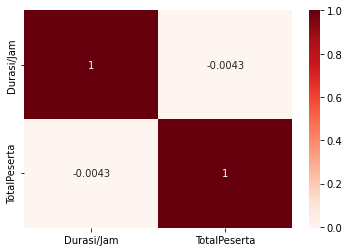

In [23]:
# Linear correlation of values
# Check if durasi has a correlation with the amount of people attending
print(fy21[['Durasi/Jam','TotalPeserta']].corr())

# Checks using a heatmap
sns.heatmap(fy21[['Durasi/Jam','TotalPeserta']].corr(), annot=True, cmap = 'Reds')
plt.show()

In [24]:
fy21_ngc = fy21.drop(labels=["Non-GovernmentOfficial","GovernmentOfficial"], axis=1) # ngc stands for "no governmental columns"
corr_fy21 = fy21_ngc.corr()
corr_fy21["TotalPeserta"].sort_values(ascending=False)

# Turns out no correlation whatsoever with other columns, at least no visible ones, hence I will be adding in other variables

TotalPeserta    1.000000
Durasi/Jam     -0.004262
FiscalYear           NaN
Name: TotalPeserta, dtype: float64

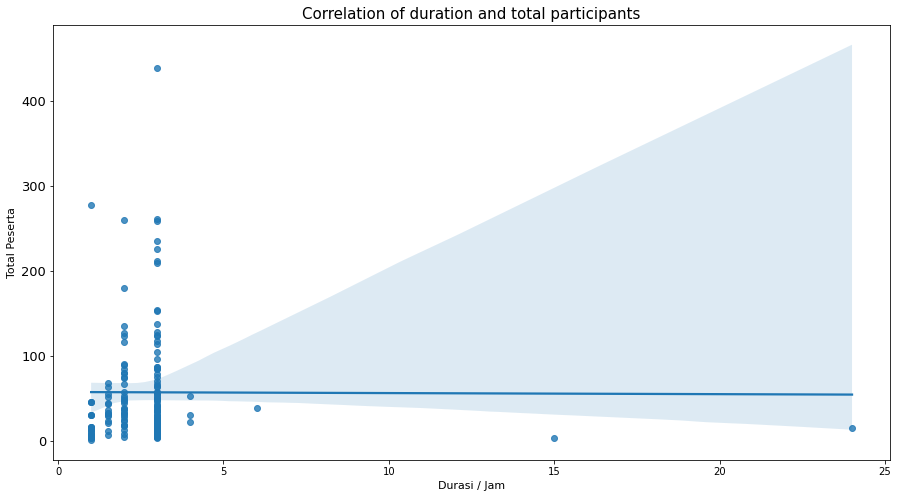

In [25]:
visualizer(fy21_ngc["Durasi/Jam"], fy21_ngc["TotalPeserta"], "reg", 
          "Correlation of duration and total participants", "Durasi / Jam",
          "Total Peserta", False)

In [27]:
pip install category_encoders

     |████████████████████████████████| 82 kB 377 kB/s 


In [29]:
import category_encoders as ce

# Categorical Data Encoding 
# Quarter (One Hot Encoding) because not ordered
print("Quarter unique values = ", fy21["Quarter"].unique())
fy21_clean_sample = fy21

#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols='Quarter',handle_unknown='return_nan',return_df=True,use_cat_names=True)

#Original Data fy21_clean_sample

Quarter unique values =  ['Q1' 'Q2' 'AY21']


In [30]:
#Fit and transform Data
fy21_encoded = encoder.fit_transform(fy21_clean_sample)
quarter_encoded = fy21_encoded[["Quarter_Q1","Quarter_Q2","Quarter_AY21"]]
quarter_encoded

,Quarter_Q1,Quarter_Q2,Quarter_AY21
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
149,0.0,0.0,1.0
150,0.0,0.0,1.0
151,0.0,0.0,1.0
152,0.0,0.0,1.0


In [31]:
# Segmen (One Hot Encoding) because also not ordered
print("Segment unique values = ", fy21["Segmen"].unique())

encoder_second=ce.OneHotEncoder(cols='Segmen',handle_unknown='return_nan',return_df=True,use_cat_names=True)

Segment unique values =  ['Higher Ed' 'Higher Ed and K-12' 'K-12' 'Corporate']


In [32]:
#Fit and transform Data
fy21_encoded = encoder_second.fit_transform(fy21_clean_sample)
fy21_encoded

,FiscalYear,Quarter,TanggalPelaksanaan,Durasi/Jam,NamaKegiatan,Program,Segmen_Higher Ed,Segmen_Higher Ed and K-12,Segmen_K-12,Segmen_Corporate,GovernmentOfficial,Non-GovernmentOfficial,TotalPeserta
0,2021.0,Q1,2020-09-15,4.0,Azure Fundamental for Higher Ed,Azure Higher Ed,1.0,0.0,0.0,0.0,12.0,10.0,22
1,2021.0,Q1,2020-09-22,4.0,Designing Azure for Academic Infrastructure,Azure Higher Ed,1.0,0.0,0.0,0.0,22.0,31.0,53
2,2021.0,Q1,2020-09-28,4.0,Designing Virtual Labs with Azure,Azure Higher Ed,1.0,0.0,0.0,0.0,18.0,13.0,31
3,2021.0,Q1,2020-09-04,3.0,Creating A Virtual Classroom using Microsoft T...,GTP,1.0,0.0,0.0,0.0,96.0,0.0,96
4,2021.0,Q1,2020-09-28,6.0,Creating Smart Classroom with Microsoft 365,GTP,1.0,0.0,0.0,0.0,39.0,0.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,2021.0,AY21,2021-06-15,3.0,Showcase Schools – Session 2: SD Al Azhar 31 Y...,Showcase School,0.0,0.0,1.0,0.0,NaN,28.0,28
150,2021.0,AY21,2021-06-18,3.0,Showcase Schools – Session 3: SD Al Azhar 31 Y...,Showcase School,0.0,0.0,1.0,0.0,NaN,25.0,25
151,2021.0,AY21,2021-06-24,3.0,Showcase Schools – Session 2: SMAK BPK Penabur...,Showcase School,0.0,0.0,1.0,0.0,NaN,26.0,26
152,2021.0,AY21,2021-04-01,24.0,Pelatihan Power BI Vads,Premium Training,0.0,0.0,0.0,1.0,NaN,15.0,15


In [33]:
# Append 
fy21_encoded = fy21_encoded.drop("Quarter", axis=1)
fy21_encoded = fy21_encoded.append(quarter_encoded)
print(fy21_encoded.head(10))


   FiscalYear TanggalPelaksanaan  ...  Quarter_Q2 Quarter_AY21
0      2021.0         2020-09-15  ...         NaN          NaN
1      2021.0         2020-09-22  ...         NaN          NaN
2      2021.0         2020-09-28  ...         NaN          NaN
3      2021.0         2020-09-04  ...         NaN          NaN
4      2021.0         2020-09-28  ...         NaN          NaN
5      2021.0         2020-09-29  ...         NaN          NaN
6      2021.0         2020-09-30  ...         NaN          NaN
7      2021.0         2020-09-17  ...         NaN          NaN
8      2021.0         2020-09-18  ...         NaN          NaN
9      2021.0         2020-09-24  ...         NaN          NaN

[10 rows x 15 columns]


In [34]:
#fy21_encoded = fy21_encoded.append(quarter_encoded)
#print(fy21_encoded.head(10))

# fy21_encoded.to_excel("FY21_ENCODED_SAMPLE.xlsx")
# Then tidied up already via excel 

   FiscalYear TanggalPelaksanaan  ...  Quarter_Q2 Quarter_AY21
0      2021.0         2020-09-15  ...         NaN          NaN
1      2021.0         2020-09-22  ...         NaN          NaN
2      2021.0         2020-09-28  ...         NaN          NaN
3      2021.0         2020-09-04  ...         NaN          NaN
4      2021.0         2020-09-28  ...         NaN          NaN
5      2021.0         2020-09-29  ...         NaN          NaN
6      2021.0         2020-09-30  ...         NaN          NaN
7      2021.0         2020-09-17  ...         NaN          NaN
8      2021.0         2020-09-18  ...         NaN          NaN
9      2021.0         2020-09-24  ...         NaN          NaN

[10 rows x 15 columns]
